# Baseline Model

This notebook carries out the Baseline Model for our Reddit data.

In [64]:
# import necessary libraries

# data manipulation libraries
import numpy as np
import json

# plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# model libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

### Set Properties

In [65]:
# make sure matplotlib parameters are default
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams.update({'font.size': 18})

# create custom color mapping
custom_cmap = LinearSegmentedColormap.from_list('', ['#ffffff', '#FF4500'])

# set font
plt.rcParams['font.family'] = 'Arial'

### Read in Data

In [66]:
# read in class labels
with open('../data/subreddit_classes.json', 'r') as file:
    classes = np.array(json.load(file))
classes = np.char.replace(classes, 'tifu', 'timu')

print('Length of Classes:', classes.shape)

Length of Classes: (200000,)


### Split into Training and Testing

In [67]:
# randomly shuffle classes
np.random.seed(512)
np.random.shuffle(classes)

# split into training and testing sets (80-20)
y_train = classes[:160000]
y_test = classes[:40000]

print('y_train length:', y_train.shape)
print(' y_test length:', y_test.shape)

y_train length: (160000,)
 y_test length: (40000,)


### Confusion Matrix Plot Function

In [68]:
# make confusion matric
def plot_confusion_matrix(confusion_matrix_var, class_labels, model_name, filename, cmap = custom_cmap, row_percent = True):
    
    # formatting
    fmt = '.0f'
    title_add = ''
    
    if row_percent == True:
        confusion_matrix_var = confusion_matrix_var / confusion_matrix_var.sum(axis=1, keepdims=True) * 100
        fmt = '.2f'
        title_add = ' (Row %)'
    
    # set plotting parameters
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize = (10, 8))

    # plot the confusion matrix using Seaborn's heatmap
    sns.heatmap(confusion_matrix_var, annot = True, fmt = fmt, cmap = cmap, cbar = True,
                xticklabels = class_labels, yticklabels = class_labels)
    plt.xlabel('Predicted Subreddit'); plt.ylabel('True Subreddit'); plt.title('Confusion Matrix - ' + model_name + title_add, fontweight = 'bold')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

### Random Classifier (Baseline)

We should build a naïve classifier in order to evaluate the performance of our Random Forest model against it.

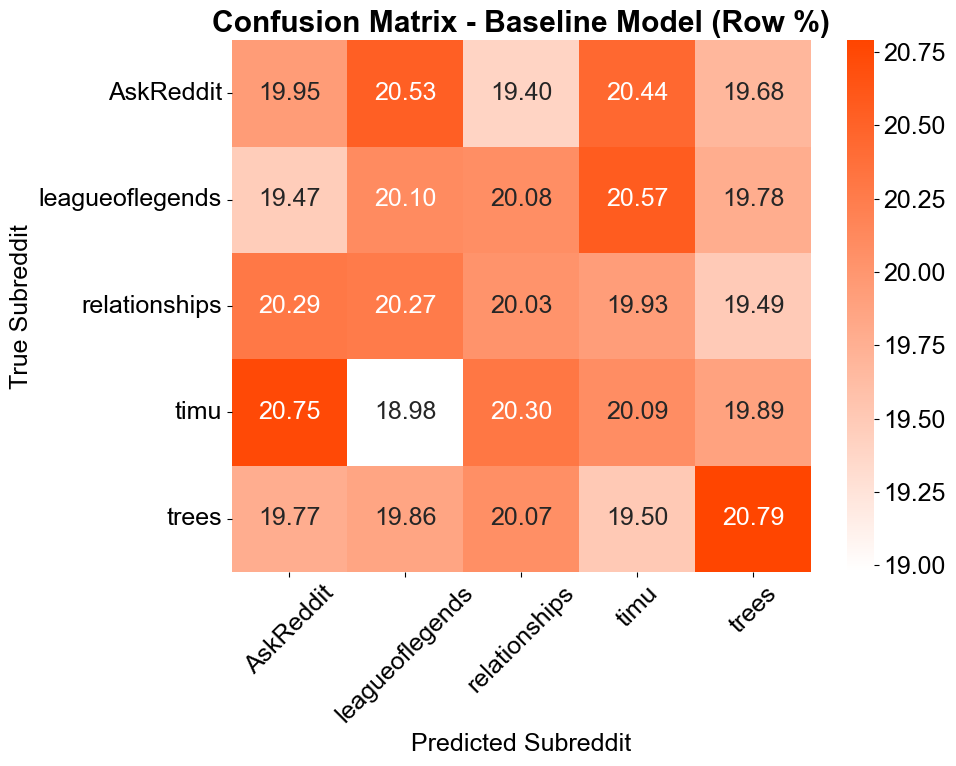

In [69]:
# generate random probabilities for classifying between the five classes, ensuring they sum to 1
random_probs = np.random.uniform(low = 0, high = 1, size = (len(y_test), 5))
row_sums = np.sum(random_probs, axis = 1)
pred_probs = np.divide(random_probs.T, row_sums).T

# gather predictions based on maximal probability for each row
max_indices = np.argmax(pred_probs, axis = 1)
unique_classes = np.unique(classes)
preds = [unique_classes[i] for i in max_indices]

# construct the confusion matrix of percentages
cm = confusion_matrix(y_pred = preds, y_true = y_test, labels = np.unique(y_test))

# plot and save the confusion matrix
plot_confusion_matrix(cm, unique_classes, model_name = 'Baseline Model', filename = '../output/BaselineResults/baseline_confusion_matrix_pct.png', row_percent = True)

In [70]:
# report overall performance
print('Accuracy:', accuracy_score(y_true = y_test, y_pred = preds))
print('Precision:', precision_score(y_true = y_test, y_pred = preds, average = 'weighted'))
print('Recall:', recall_score(y_true = y_test, y_pred = preds, average = 'weighted'))
print('ROC AUC:', roc_auc_score(y_true = y_test, y_score = pred_probs, multi_class = 'ovr'))

Accuracy: 0.201925
Precision: 0.2019613853183437
Recall: 0.201925
ROC AUC: 0.4992046692319276
